In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# BDD100K (Segmap 10K Cross-Check) #

## Segmaps ##

In [2]:
segset_images_test = glob.glob("/home/SharedFolder/CurrentDatasets/bdd100k/seg/images/test/**.jpg", recursive = True)
segset_images_test = [segset_images_test[i].split(os.sep)[-1] for i in range(len(segset_images_test))]
segset_images_valid = glob.glob("/home/SharedFolder/CurrentDatasets/bdd100k/seg/images/val/**.jpg", recursive = True)
segset_images_valid = [segset_images_valid[i].split(os.sep)[-1] for i in range(len(segset_images_valid))]
segset_images_train = glob.glob("/home/SharedFolder/CurrentDatasets/bdd100k/seg/images/train/**.jpg", recursive = True)
segset_images_train = [segset_images_train[i].split(os.sep)[-1] for i in range(len(segset_images_train))]
df_bdd_aspectratios = pd.read_csv("bdd_aspectratios.csv")
df_bdd_aspectratios["aspectratios"] = (df_bdd_aspectratios["width"] / df_bdd_aspectratios["height"]).round(2).astype(str) + ":1"
df_bdd_aspectratios["resolutions"] = df_bdd_aspectratios["width"].astype(str).str.cat(df_bdd_aspectratios[["height"]].astype(str), sep="x")

## Test Set ##

### Distribution within Segmap Set ###

In [3]:
df_bdd_aspectratios_test = df_bdd_aspectratios[df_bdd_aspectratios["set"] == "test"]
df_in_seg_test = df_bdd_aspectratios_test[df_bdd_aspectratios_test.file.isin(segset_images_test)]
df_in_seg_valid = df_bdd_aspectratios_test[df_bdd_aspectratios_test.file.isin(segset_images_valid)]
df_in_seg_train = df_bdd_aspectratios_test[df_bdd_aspectratios_test.file.isin(segset_images_train)]
print(f"Number of test set images in segmap test set: {df_in_seg_test.file.count()}")
print(f"Number of test set images in segmap valid set: {df_in_seg_valid.file.count()}")
print(f"Number of test set images in segmap train set: {df_in_seg_train.file.count()}")

Number of test set images in segmap test set: 830
Number of test set images in segmap valid set: 0
Number of test set images in segmap train set: 0


### Weather ###

No label data for test set available.

### Time-of-Day ###

No label data for test set available.

### Objects ###

No label data for test set available.

## Validation Set ##

In [4]:
labelfile_valid = "/home/SharedFolder/CurrentDatasets/bdd100k/labels/bdd100k_labels_images_val.json"
df_bdd_valid = pd.read_json(labelfile_valid)
df_bdd_valid_attributes = pd.DataFrame(df_bdd_valid['attributes'].tolist())
df_bdd_valid_attributes['name'] = df_bdd_valid['name']

### Distribution within Segmap Set ###

In [5]:
df_bdd_aspectratios_valid = df_bdd_aspectratios[df_bdd_aspectratios["set"] == "val"]
df_in_seg_test = df_bdd_aspectratios_valid[df_bdd_aspectratios_valid.file.isin(segset_images_test)]
df_in_seg_valid = df_bdd_aspectratios_valid[df_bdd_aspectratios_valid.file.isin(segset_images_valid)]
df_in_seg_train = df_bdd_aspectratios_valid[df_bdd_aspectratios_valid.file.isin(segset_images_train)]
print(f"Number of valid set images in segmap test set: {df_in_seg_test.file.count()}")
print(f"Number of valid set images in segmap valid set: {df_in_seg_valid.file.count()}")
print(f"Number of valid set images in segmap train set: {df_in_seg_train.file.count()}")
df_bdd_valid_attributes = df_bdd_valid_attributes[df_bdd_valid_attributes["name"].isin(segset_images_test + segset_images_valid + segset_images_train)]
df_bdd_valid = df_bdd_valid[df_bdd_valid["name"].isin(segset_images_test + segset_images_valid + segset_images_train)]

Number of valid set images in segmap test set: 0
Number of valid set images in segmap valid set: 0
Number of valid set images in segmap train set: 454


### Weather ###

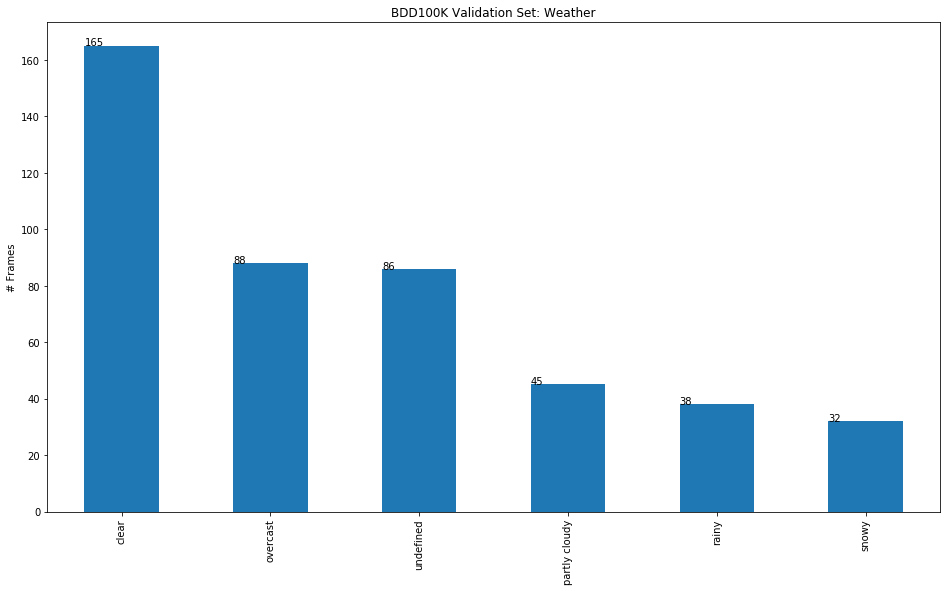

In [6]:
ax_weather = df_bdd_valid_attributes["weather"].value_counts().plot(kind = "bar", title = "BDD100K Validation Set: Weather", figsize = (16, 9))
for p in ax_weather.patches:
    ax_weather.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
ax_weather.set_ylabel("# Frames");

### Time-of-Day ###

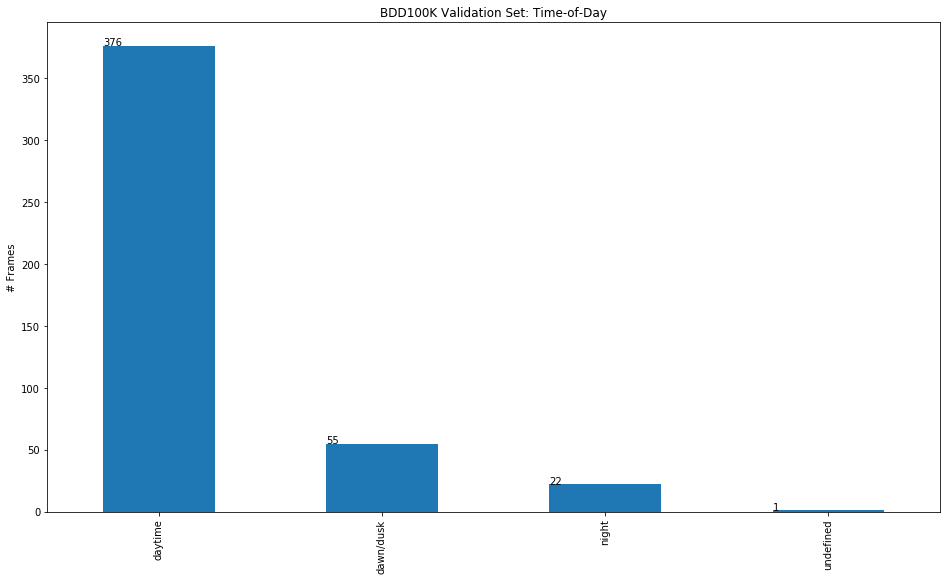

In [7]:
ax_timeofday = df_bdd_valid_attributes["timeofday"].value_counts().plot(kind = "bar", title = "BDD100K Validation Set: Time-of-Day", figsize = (16, 9))
for p in ax_timeofday.patches:
    ax_timeofday.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
ax_timeofday.set_ylabel("# Frames");

### Objects ###

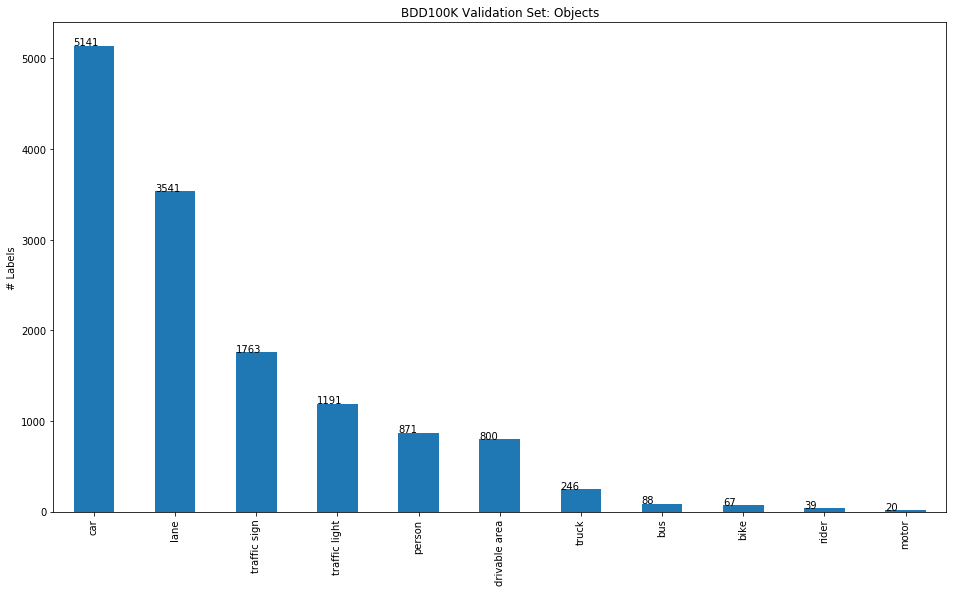

In [8]:
ax_objects = pd.DataFrame([item for sublist in df_bdd_valid["labels"].tolist() for item in sublist])["category"].value_counts().plot(kind = "bar", title = "BDD100K Validation Set: Objects", figsize = (16, 9))
for p in ax_objects.patches:
    ax_objects.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
ax_objects.set_ylabel("# Labels");

## Training Set ##

In [9]:
labelfile_train = "/home/SharedFolder/CurrentDatasets/bdd100k/labels/bdd100k_labels_images_train.json"
df_bdd_train = pd.read_json(labelfile_train)
df_bdd_train_attributes = pd.DataFrame(df_bdd_train['attributes'].tolist())
df_bdd_train_attributes['name'] = df_bdd_train['name']

### Distribution within Segmap Set ###

In [10]:
df_bdd_aspectratios_train = df_bdd_aspectratios[df_bdd_aspectratios["set"] == "train"]
df_in_seg_test = df_bdd_aspectratios_train[df_bdd_aspectratios_train.file.isin(segset_images_test)]
df_in_seg_valid = df_bdd_aspectratios_train[df_bdd_aspectratios_train.file.isin(segset_images_valid)]
df_in_seg_train = df_bdd_aspectratios_train[df_bdd_aspectratios_train.file.isin(segset_images_train)]
print(f"Number of train set images in segmap test set: {df_in_seg_test.file.count()}")
print(f"Number of train set images in segmap valid set: {df_in_seg_valid.file.count()}")
print(f"Number of train set images in segmap train set: {df_in_seg_train.file.count()}")
df_bdd_train_attributes = df_bdd_train_attributes[df_bdd_train_attributes["name"].isin(segset_images_test + segset_images_valid + segset_images_train)]
df_bdd_train = df_bdd_train[df_bdd_train["name"].isin(segset_images_test + segset_images_valid + segset_images_train)]

Number of train set images in segmap test set: 0
Number of train set images in segmap valid set: 0
Number of train set images in segmap train set: 2976


### Weather ###

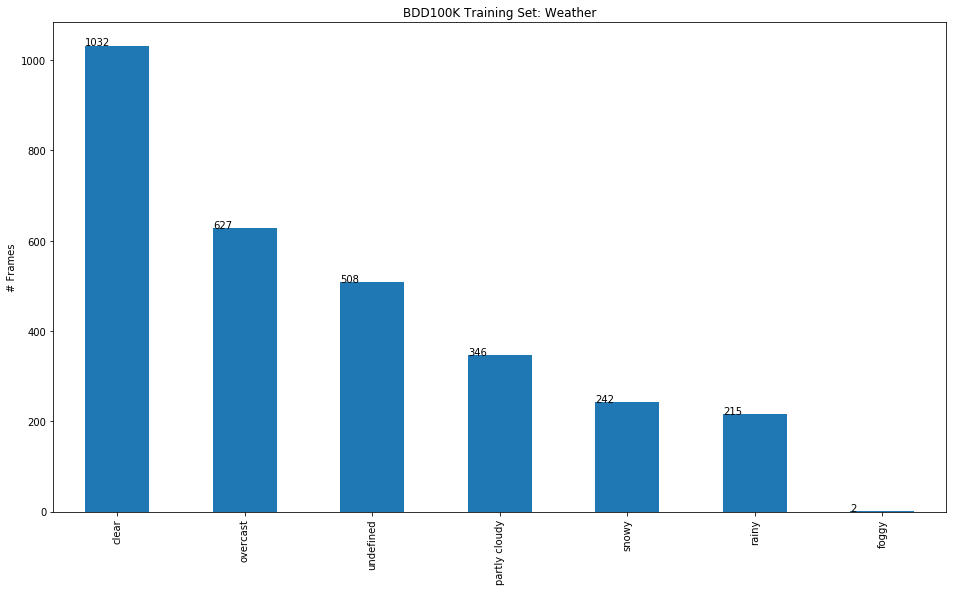

In [11]:
ax_weather = df_bdd_train_attributes["weather"].value_counts().plot(kind = "bar", title = "BDD100K Training Set: Weather", figsize = (16, 9))
for p in ax_weather.patches:
    ax_weather.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
ax_weather.set_ylabel("# Frames");

### Time-of-Day ##

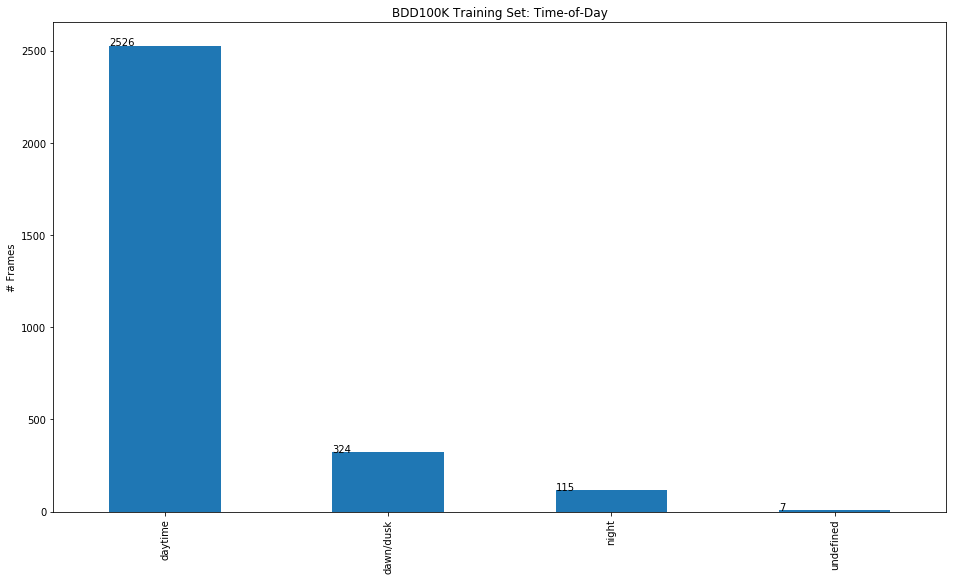

In [12]:
ax_timeofday = df_bdd_train_attributes["timeofday"].value_counts().plot(kind = "bar", title = "BDD100K Training Set: Time-of-Day", figsize = (16, 9))
for p in ax_timeofday.patches:
    ax_timeofday.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
ax_timeofday.set_ylabel("# Frames");

### Objects ###

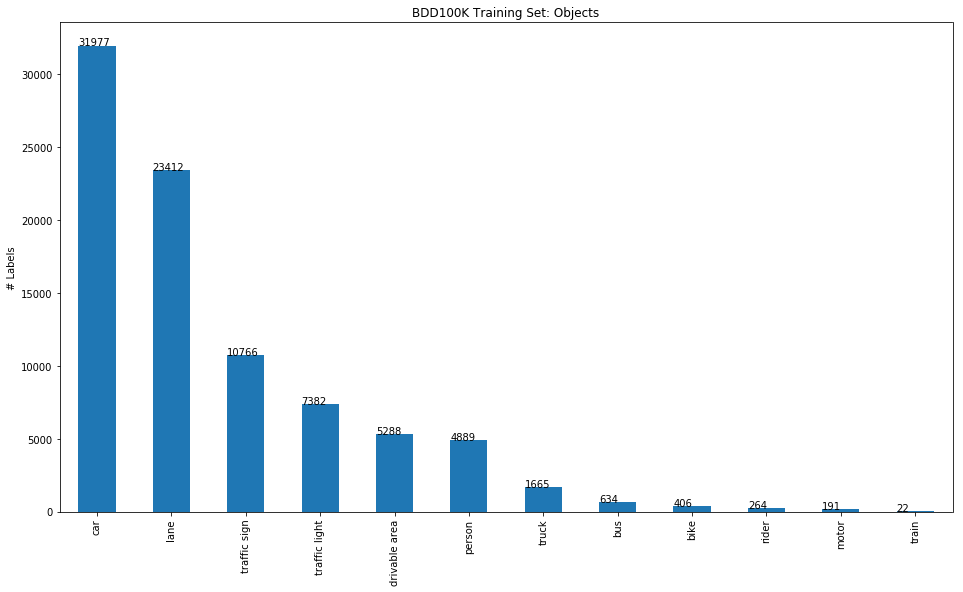

In [13]:
ax_objects = pd.DataFrame([item for sublist in df_bdd_train["labels"].tolist() for item in sublist])["category"].value_counts().plot(kind = "bar", title = "BDD100K Training Set: Objects", figsize = (16, 9))
for p in ax_objects.patches:
    ax_objects.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
ax_objects.set_ylabel("# Labels");